<a href="https://colab.research.google.com/github/volosciucedmond/Proiect-LAB-MEDII-VIZUALE-2022/blob/main/regresie_liniara_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<p style = "font-size:300%; text-align:center; color:#336600"> <b>Regresie liniară</b></p>

# Ce este regresia liniară?
---
**Regresia liniară** este un fel de analiză statistică care încearcă să arate o relație între două variabile: una independentă (de exemplu X) și alta dependentă (de exemplu Y). Aceasta privește mai multe puncte de date, după care trasează o linie de trend. Poate fi folosită în prezicerea pe date aleatorii care prezintă tendințe în date, cum ar fi în diagnosticarea cancerului sau în prețul acțiunilor.


# Problemă
---
Predicția cheltuielilor unei comapnii de închiriat mașini (în euro) care deține 13 mașini. Se consideră că fiecare companie deține mașini noi, și de caracteristici asemănătoare. <br>
**Obiectiv**: construirea unei regresii liniare simple pentru a corelaționa numărul de mașini cu cheltuielile.

---
Vom importa librăriile de care avem nevoie în rezolvarea problemei noastre:<br>


* **numpy** - folosită pentru lucrul cu matrici   
* **pandas** - folosită pentru a colecta datele intr-o structură de date, ușurând utilizarea lor de către regresia liniară
*   **sklearn.model_selection** - pentru etapa de antrenare și testare importăm **train_test_split**, iar pentru construirea modelului regresiei liniare importăm **LogisticRegression**




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Vom trece datele pe care le deținem despre numărul de vehicule și costuri, intr-o structură de date (DataFrame), folosindu-ne de **pandas**, după care le afișăm.

In [ ]:
salary_data = {
    'number_of_vehicules': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'costs': [1000.00, 1342.32, 1594.34, 1723.87, 1675.98, 1764.54, 1774.25, 1845.44, 1888.04, 1955.14, 1994.44, 2047.69, 2213.16, 2314.74, 2478.95, 2624.74, 2594.65, 2623.53, 2698.98, 2873.23, 2937.32, 3021.23, 3123.54, 3245.76, 3423.23, 3413.42, 3756.48]
}

df = pd.DataFrame(salary_data, columns = ['number_of_vehicules', 'costs'])
print(df)

    number_of_vehicules    costs
0                     3  1000.00
1                     4  1342.32
2                     5  1594.34
3                     6  1723.87
4                     7  1675.98
5                     8  1764.54
6                     9  1774.25
7                    10  1845.44
8                    11  1888.04
9                    12  1955.14
10                   14  1994.44
11                   15  2047.69
12                   16  2213.16
13                   17  2314.74
14                   18  2478.95
15                   19  2624.74
16                   20  2594.65
17                   21  2623.53
18                   22  2698.98
19                   23  2873.23
20                   24  2937.32
21                   25  3021.23
22                   26  3123.54
23                   27  3245.76
24                   28  3423.23
25                   29  3413.42
26                   30  3756.48


Acum vom genera graficul reprezentat de setul de date pe care îl deținem folosind librăria mathplotlib.

Text(0.5, 0, 'Number of vehicules')

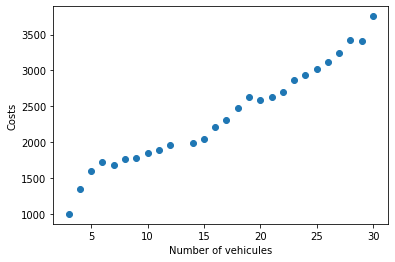

In [ ]:
import matplotlib.pyplot as plt
x = df[['number_of_vehicules']]
y = df[['costs']]
plt.scatter(x,y)
plt.ylabel("Costs")
plt.xlabel("Number of vehicules")

Acum vom antrena și testa. Astfel, alocăm 80% din setul de date de mai sus pentru antrenare, iar restul de 20% pentru testare.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

Vom afișa datele care au fost alese aleator pentru antrenare.

In [ ]:
print(x_train)

    number_of_vehicules
23                   27
13                   17
19                   23
20                   24
16                   20
1                     4
10                   14
26                   30
25                   29
8                    11
6                     9
4                     7
18                   22
9                    12
7                    10
22                   26
3                     6
0                     3
21                   25
15                   19
12                   16


Vom afișa datele care au fost alese aleator pentru testare.

In [ ]:
print(x_test)

    number_of_vehicules
2                     5
24                   28
14                   18
17                   21
5                     8
11                   15


Se aplică regresia liniară pe setul de date antrenate. Funcția **fit** va fi folosită pentru finalizarea procesului de antrenare, iar separarea datelor de antrenare de cele pentru testare se va realiza cu ajutorul lui **train_test_split**.

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Vom apela funcția **predict**:

In [ ]:
y_pred=regressor.predict(x_test)
print(y_pred)

[[1381.0428222 ]
 [3322.17176548]
 [2478.20265971]
 [2731.39339144]
 [1634.23355394]
 [2225.01192798]]


Acum vom vedea care ar fi costul unei companii care deține 13 mașini.

In [ ]:
print(regressor.predict([[13]]))

[[2056.21810682]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Așadar, o comapnie care deține 13 mașini ar putea avea un cost de 2056.21 euro.

Acum vom încerca pentru un număr de 31 de mașini.

In [ ]:
print(regressor.predict([[31]]))

[[3575.36249721]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Observăm că pentru o companie care deține 31 de mașini costul ar putea fi de 3575.36, adica cu aproximativ 200 mai mic față de o companie cu 30 de mașini. Așadar se poate observa că modelul nostru nu este antrenat pe un număr destul de mare de date astfel încât să poată face o prezicere pentru un număr mai mare de mașini.